In [1]:
import cv2

# Reading,Displaying and saving images


In [2]:
gray_img = cv2.imread('image-1.jpg',cv2.IMREAD_GRAYSCALE)

# Writing as png

In [ ]:
cv2.imwrite('output.png',gray_img,[cv2.IMWRITE_PNG_COMPRESSION])

In [ ]:
#IMAGE COLORSPACES

In [3]:
grey = cv2.imread('pm.jpeg')

In [4]:
yuv_image = cv2.cvtColor(grey,cv2.COLOR_BGR2YUV)

In [5]:
y,u,v = cv2.split(yuv_image)
cv2.imshow('Y channel', y)
cv2.imshow('U channel', u)
cv2.imshow('V channel', v)
cv2.waitKey()
cv2.destroyAllWindows()

#dont click red cross tap any button on keyboard

In [6]:
img = cv2.imread('pm.jpeg', cv2.IMREAD_COLOR)
g,b,r = cv2.split(img)
gbr_img = cv2.merge((g,b,r))
rbr_img = cv2.merge((r,b,r))
cv2.imshow('Original', img)
cv2.imshow('GRB', gbr_img)
cv2.imshow('RBR', rbr_img)
cv2.waitKey()
cv2.destroyAllWindows()

## IMAGE TRANSLATION

In [7]:
import cv2
import numpy as np
img = cv2.imread('pm.jpeg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,-200], [0,1,200] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols+200,
num_rows+200), cv2.INTER_LINEAR)
cv2.imshow('Translation', img_translation)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
 import numpy as np
img = cv2.imread('pm.jpeg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70,
num_rows + 110))
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix,
(num_cols + 70 + 30, num_rows + 110 + 50))
cv2.imshow('Translation', img_translation)
cv2.waitKey()
cv2.destroyAllWindows()

# AFFINE TRANSFORMATIONS

In [8]:
#parallelize
import cv2
import numpy as np
img = cv2.imread('trial.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0],
[int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))
cv2.imshow('Input', img)
cv2.imshow('Output', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
import cv2
import numpy as np
img = cv2.imread('trial.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[cols-1,0], [0,0],[cols-1,rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))
cv2.imshow('Input', img)
cv2.imshow('Output', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

# PROJECTIVE TRANSFORMATIONS 

In [10]:
import cv2
import numpy as np
img = cv2.imread('trial.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1],[cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0],[int(0.33*cols),rows-1],[int(0.66*cols),rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))
cv2.imshow('Input', img)
cv2.imshow('Output', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

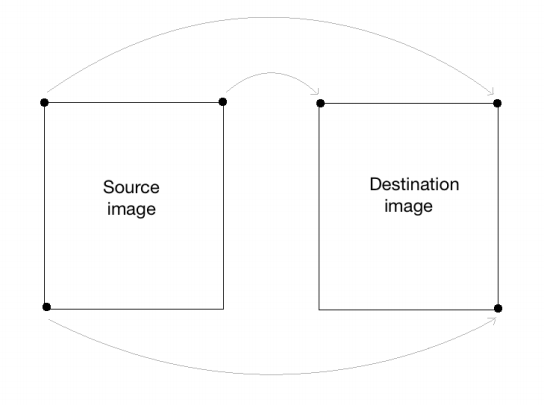 

In [11]:
import cv2
import numpy as np
img = cv2.imread('trial.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [0,rows-1], [cols/2,0],[cols/2,rows-1]])
dst_points = np.float32([[0,100], [0,rows-101],[cols/2,0],[cols/2,rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))
cv2.imshow('Input', img)
cv2.imshow('Output', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
import cv2
import numpy as np
import math
img = cv2.imread('trial.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape


img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0
cv2.imshow('Input', img)
cv2.imshow('Vertical wave', img_output)

cv2.waitKey()
cv2.destroyAllWindows()

# BLURRING 

In [15]:
import cv2
import numpy as np

img = cv2.imread('trial.jpg')
row,cols = img.shape[:2]

kernel_identity = np.array([[0,0,0],[0,1,0],[0,0,0]])
kernel_3x3 = np.ones((3,3),np.float32)/9.0

kernel_5x5 = np.ones((5,5),np.float32)/25.0

cv2.imshow('Original',img)

output = cv2.filter2D(img, -1, kernel_identity)
cv2.imshow('Identity filter', output)

output = cv2.filter2D(img, -1, kernel_3x3)
cv2.imshow('3x3 filter', output)

output = cv2.filter2D(img, -1, kernel_5x5)
cv2.imshow('5x5 filter', output)

cv2.waitKey(0)
cv2.destroyAllWindows()


#### Larger the kernel more the blur , Also we can use cv2.blur(img,(3,3))

In [16]:
a = np.zeros((15,15))

In [17]:
a[7,:] = np.ones(15)

In [24]:
img = cv2.imread()


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [25]:
img =  cv2.imread('trial.jpg')
cv2.imshow('Original',img)
size =15

kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size
# applying the kernel to the input image
output = cv2.filter2D(img, -1, kernel_motion_blur)
cv2.imshow('Motion', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
import cv2
import numpy as np
img = cv2.imread('trial.jpg')
cv2.imshow('Original', img)
# generating the




kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[2,2,2], [2,-14,2], [2,2,2]])/2
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
[-1,2,2,2,-1],
[-1,2,8,2,-1],
[-1,2,2,2,-1],
[-1,-1,-1,-1,-1]]) / 8.0
# applying different kernels to the input image
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)
cv2.imshow('Sharpening', output_1)
cv2.imshow('Excessive Sharpening', output_2)
cv2.imshow('Edge Enhancement', output_3)
cv2.waitKey(0)

cv2.destroyAllWindows()

# EMBOSSING